### Open the dataset.

In [1]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [3]:
data_numerical.describe().reset_index()

,index,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
1,mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
2,std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
3,min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


### Baseline model

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

model_baseline = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())

cv_result = cross_validate(model_baseline, data_numerical, target, cv=10, return_estimator=True)
cv_result

{'fit_time': array([0.03969359, 0.06032848, 0.07282591, 0.10112786, 0.07985401,
        0.03784537, 0.03095651, 0.02575922, 0.09142065, 0.09309554]),
 'score_time': array([0.00858021, 0.00876474, 0.01026106, 0.00867224, 0.01014543,
        0.00786591, 0.00897193, 0.00872469, 0.00844097, 0.00827265]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

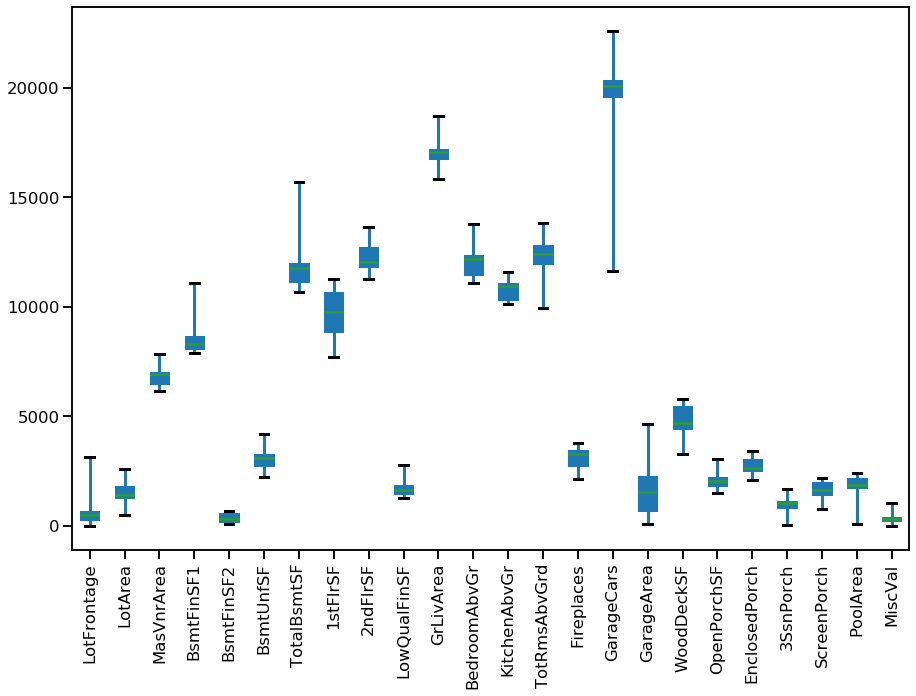

In [69]:
model_ridge = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())

cv_result = cross_validate(model_ridge, data_numerical, target, cv=10, return_estimator=True)
cv_result

coefs = [estimator[-1].coef_ for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

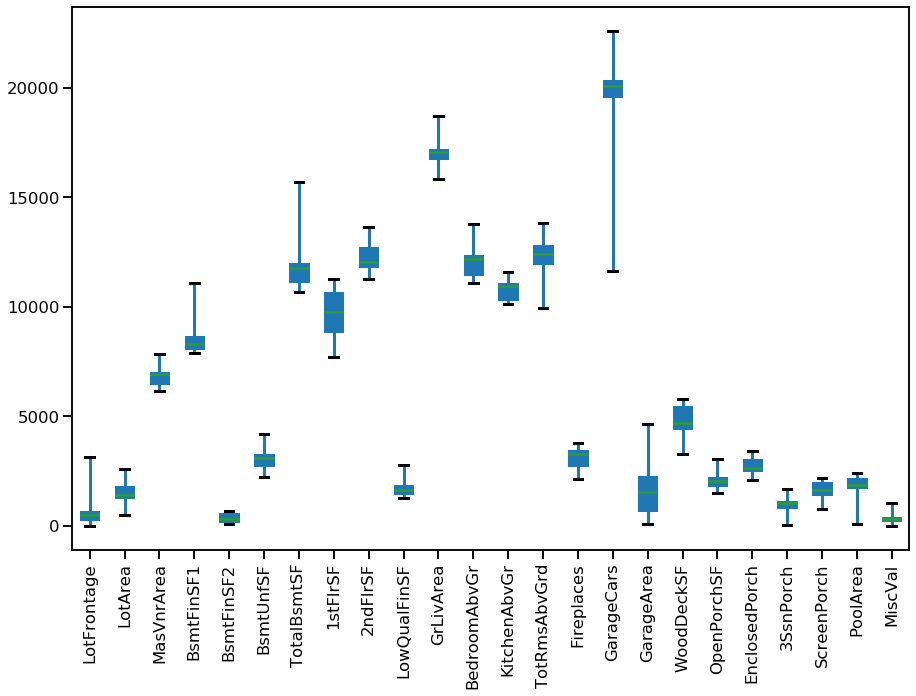

In [70]:
model_ridge = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())

cv_result = cross_validate(model_ridge, data_numerical[numerical_features], target, cv=10, return_estimator=True)
cv_result

coefs = [estimator[-1].coef_ for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

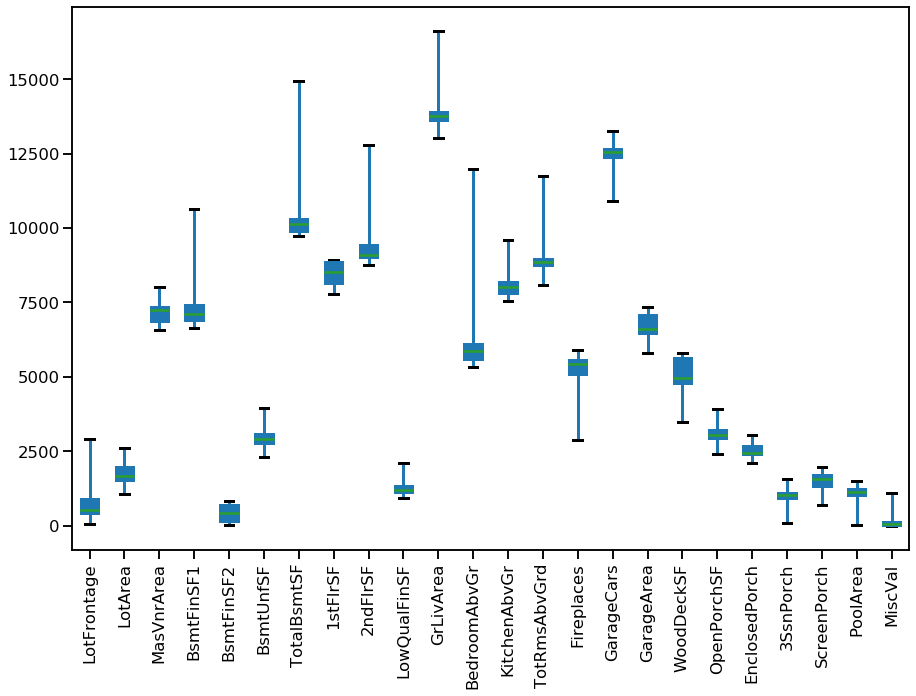

In [103]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-1, 3, num=30)
model = make_pipeline(
    StandardScaler(), SimpleImputer(), RidgeCV(alphas=alphas))

cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True )

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)



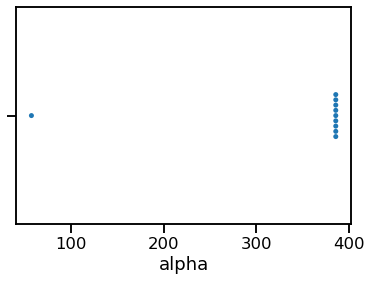

In [119]:
alpha = [estimator[-1].alpha_ for estimator in cv_results["estimator"]]
alpha = pd.Series(alpha, name="alpha")
ax = sns.swarmplot(alpha)


# Census adult

In [79]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [88]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [102]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


model_dummy = make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent"))
cv_result = cross_validate(model_dummy, data, target, cv=10)
display(cv_result["test_score"].mean())


model_logist = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model_logist, data, target, cv=10, return_estimator=True)
display(cv_result["test_score"].mean())

0.7607182352166999

0.7998445658834604

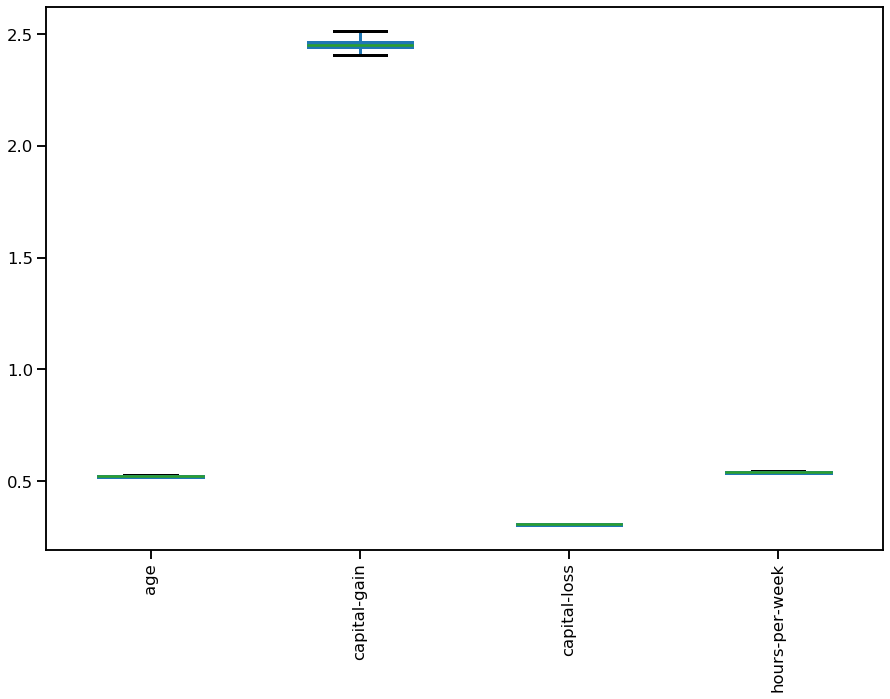

In [115]:
coefs = [estimator[-1].coef_[0] for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

# Census adult 2

In [120]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [ ]:
from sklearn.

In [122]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('numerical', StandardScaler(), numerical_columns)
])

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

cv_results = cross_validate(model, data, target,
                           cv=10, return_estimator=True)

In [127]:
cv_results["test_score"].mean()

0.8515007498426126

In [129]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

cv_results = cross_validate(model, data[numerical_columns], target,
                           cv=10, return_estimator=True)

cv_results["test_score"].mean()                      

0.7998445658834604

In [133]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["categorical"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

In [146]:
coefs = cv_results["estimator"][8]["logisticregression"].coef_

In [162]:
coefs = pd.DataFrame({"as":coefs.tolist()[0],"asd":feature_names})

In [163]:
coefs.sort_values("as")

,as,asd
22,-1.588906,education_ Preschool
64,-1.408361,native-country_ Columbia
14,-1.217719,education_ 7th-8th
12,-1.169715,education_ 1st-4th
15,-1.027001,education_ 9th
...,...,...
26,1.524022,marital-status_ Married-AF-spouse
27,1.638844,marital-status_ Married-civ-spouse
23,1.888958,education_ Prof-school
19,1.949721,education_ Doctorate


/home/enrique/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


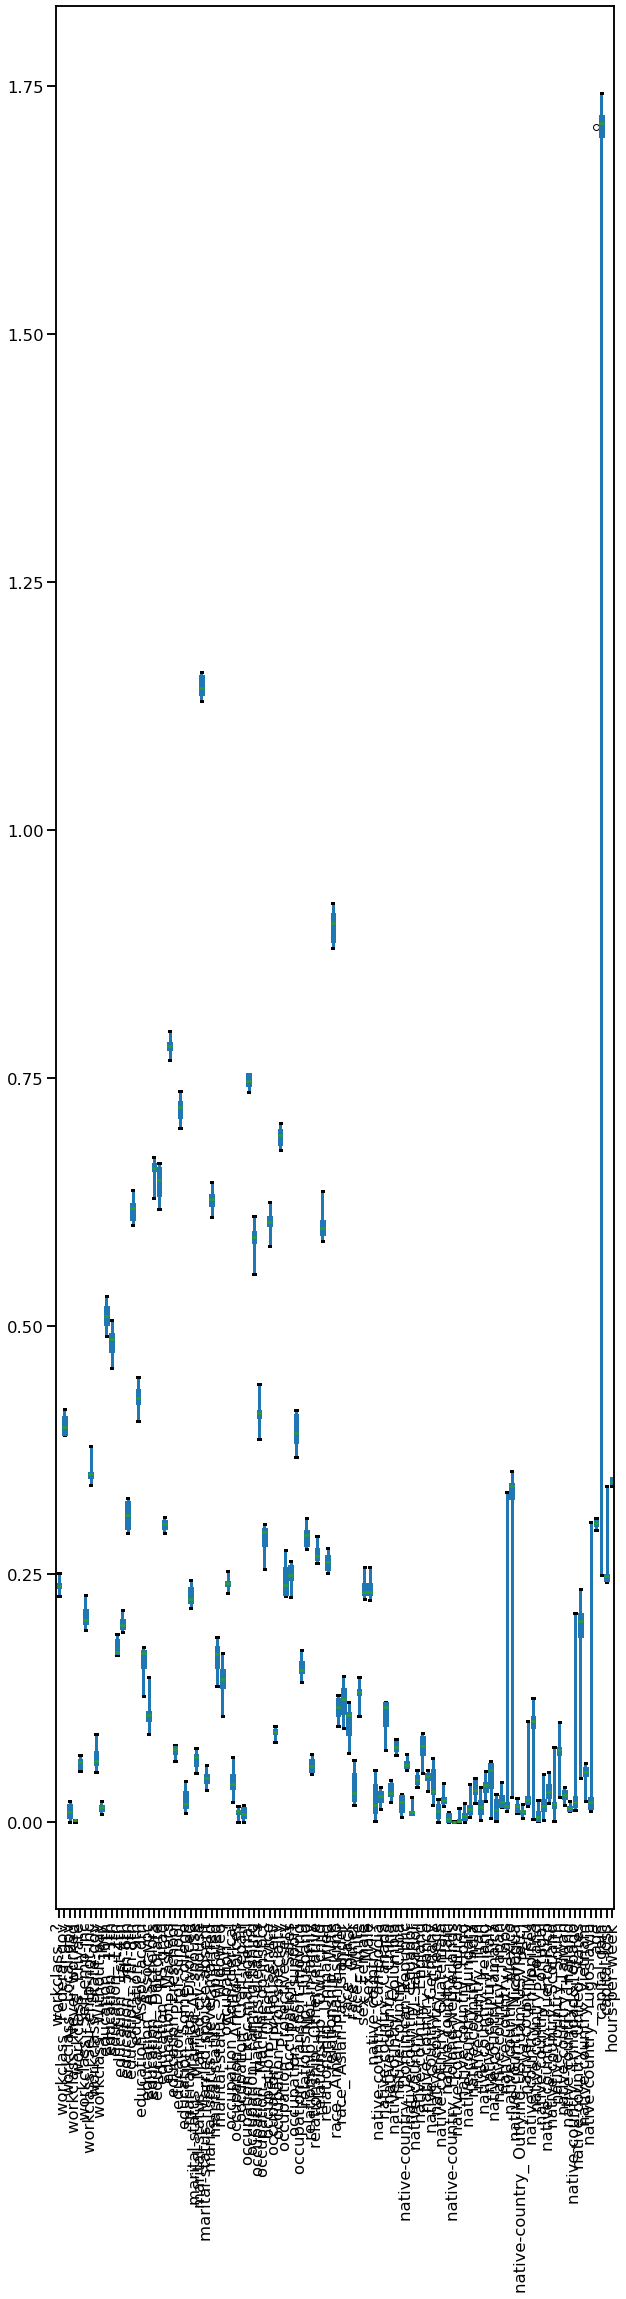

In [165]:
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)